In [98]:
from T_UNet_A import t_unet_a
from T_UNet_A_D import t_unet_a_d
from T_UNet_A_D_AS import t_unet_a_d_as
from U_Net import u_net
from U_Net_D import u_net_d
from loss import dice_loss

In [99]:
model_t_unet_a = t_unet_a('adam', (256, 256, 1), dice_loss)
model_t_unet_a.load_weights('../model_2/unet_a.h5')

In [100]:
model_t_unet_a_d = t_unet_a_d('adam', (256, 256, 1), dice_loss)
model_t_unet_a_d.load_weights('../model_2/unet_a_d.h5')

In [101]:
model_t_unet_a_d_as = t_unet_a_d_as('adam', (256, 256, 1), dice_loss)
model_t_unet_a_d_as.load_weights('../model_2/unet_a_d_aspp.h5')

In [102]:
model_u_net = u_net('adam', (256, 256, 1), dice_loss)
model_u_net.load_weights('../model_2/unet.h5')

In [103]:
model_u_net_d = u_net_d('adam', (256, 256, 1), dice_loss)
model_u_net_d.load_weights('../model_2/unet_d.h5')

In [104]:
models_with_names = {'U-Net': model_u_net, 'U-Net-D': model_u_net_d, 'U-Net-A': model_t_unet_a,
                     'U-Net-A-D': model_t_unet_a_d, 'U-Net-A-D-AS': model_t_unet_a_d_as}

In [105]:
from single_prediction import predict_image_and_plot, predict_image

In [106]:
image_path = '../training_dataset/tianditu/test/custom/col.png'

1/1 [==============================] - 1s 538ms/step


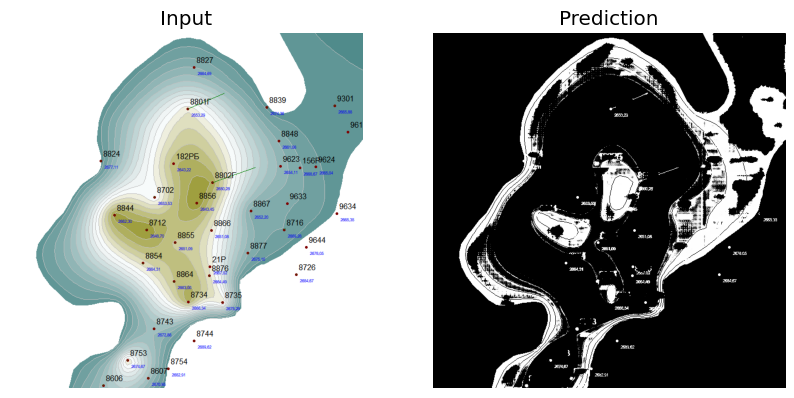

In [107]:
predict_image_and_plot(image_path, model_t_unet_a_d_as)

1/1 [==============================] - 0s 17ms/step


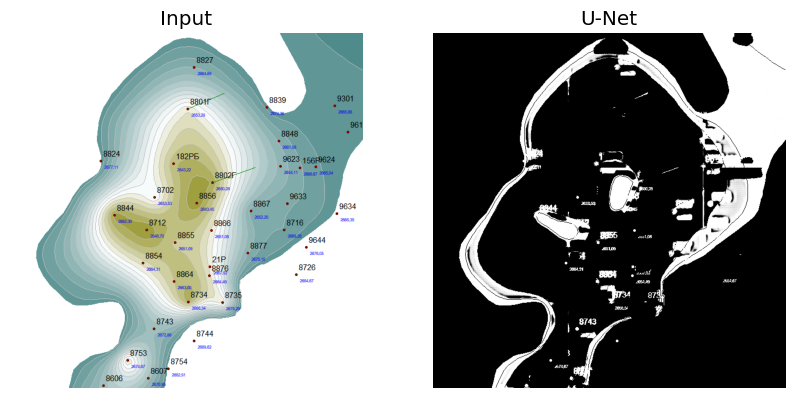

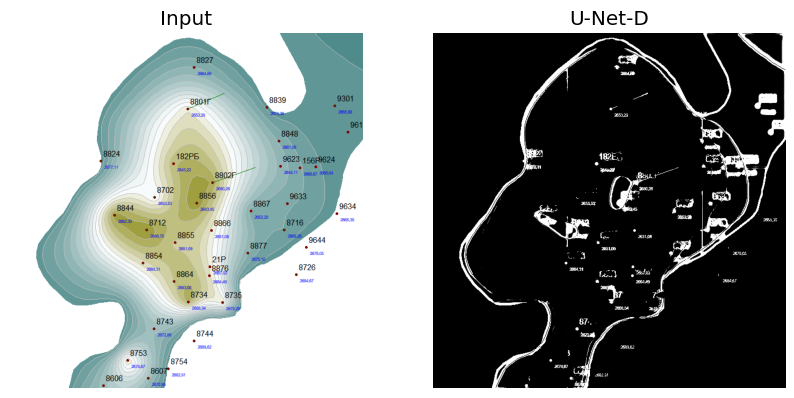

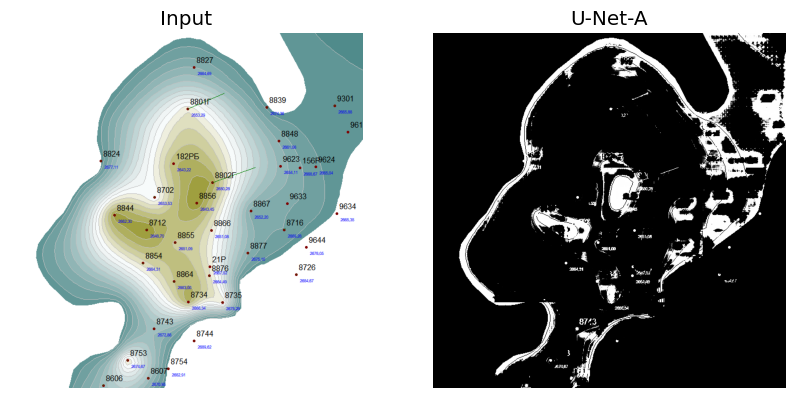

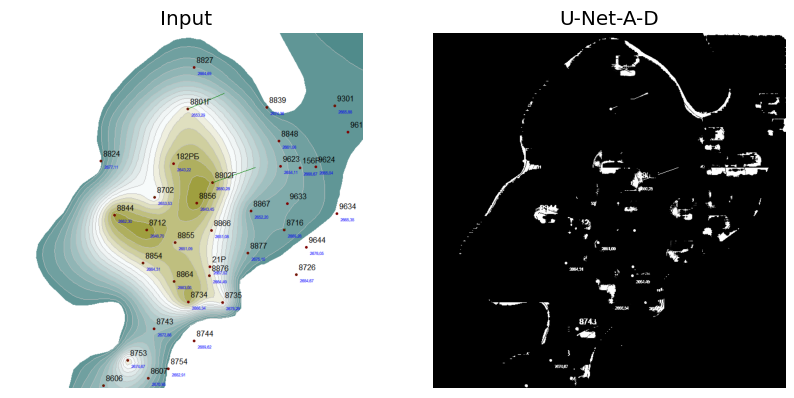

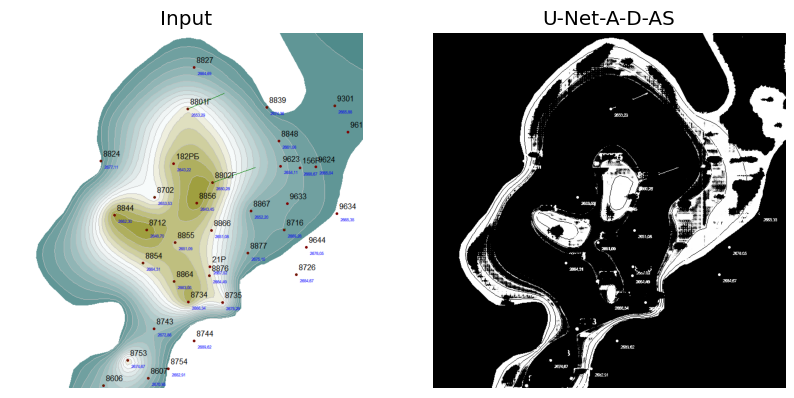

In [108]:
for name, model in models_with_names.items():
    predict_image_and_plot(image_path, model, name)

1/1 [==============================] - 0s 17ms/step


(-0.5, 1342.5, 783.5, -0.5)

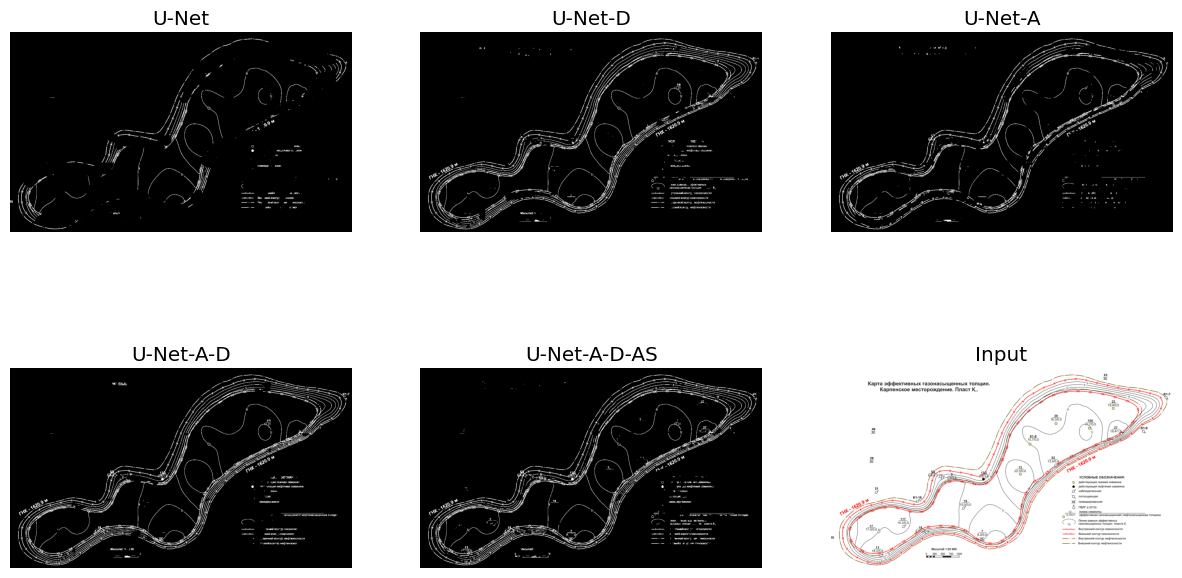

In [116]:
import matplotlib.pyplot as plt
import numpy as np

num_models = len(models_with_names) + 1
columns = min(num_models, 3)
rows = (num_models + 2) // 3
image_path = '../training_dataset/tianditu/test/custom/газонас толщины.png'

fig, axs = plt.subplots(rows, columns, figsize=(5 * columns, 4 * rows), facecolor='w')
for i, (name, model) in enumerate(models_with_names.items()):
    pred_img = predict_image(image_path, model)
    axs[i // columns, i % columns].imshow(pred_img.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
    axs[i // columns, i % columns].set_title(name)
    axs[i // columns, i % columns].axis('off')

axs[rows - 1, columns - 1].imshow(plt.imread(image_path))
axs[rows - 1, columns - 1].set_title('Input')
axs[rows - 1, columns - 1].axis('off')

In [110]:
# Evaluate the models

from dataloader import get_data

In [111]:
test_images, test_masks = get_data('../training_dataset/tianditu/test/', train=True)

Getting and resizing images ... 


  0%|          | 0/40 [00:00<?, ?it/s]

C:\python3.10\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


Done!


In [112]:
for name, model in models_with_names.items():
    print(f'Evaluating {name}')
    model.evaluate(test_images, test_masks)

Evaluating U-Net
2/2 [==============================] - 1s 54ms/step - loss: 0.0644 - dsc: 0.9384 - tp: 0.9449 - tn: 0.9977 - prec: 0.9286 - recall: 0.9484
Evaluating U-Net-D
2/2 [==============================] - 1s 30ms/step - loss: 0.0606 - dsc: 0.9415 - tp: 0.9616 - tn: 0.9971 - prec: 0.9452 - recall: 0.9379
Evaluating U-Net-A
2/2 [==============================] - 1s 19ms/step - loss: 0.0542 - dsc: 0.9486 - tp: 0.9499 - tn: 0.9986 - prec: 0.9330 - recall: 0.9648
Evaluating U-Net-A-D
2/2 [==============================] - 1s 20ms/step - loss: 0.0643 - dsc: 0.9348 - tp: 0.9413 - tn: 0.9975 - prec: 0.9252 - recall: 0.9446
Evaluating U-Net-A-D-AS
2/2 [==============================] - 1s 29ms/step - loss: 0.0589 - dsc: 0.9430 - tp: 0.9631 - tn: 0.9971 - prec: 0.9464 - recall: 0.9397


In [113]:
# make table of results
import pandas as pd

results = {}
for name, model in models_with_names.items():
    results[name] = model.evaluate(test_images, test_masks, verbose=0)

results = pd.DataFrame(results, index=['Loss', 'Dice', 'TP', 'TN', 'Prec', 'Recall'])
# swap rows and columns
results = results.T
# pretty print
results

# Calculate F1 score
results['F1'] = 2 * results['Prec'] * results['Recall'] / (results['Prec'] + results['Recall'])
results

,Loss,Dice,TP,TN,Prec,Recall,F1
U-Net,0.064431,0.938382,0.944857,0.997651,0.928643,0.948404,0.938420
U-Net-D,0.060615,0.941461,0.961571,0.997057,0.945192,0.937915,0.941539
U-Net-A,0.054156,0.948558,0.949898,0.998550,0.932966,0.964756,0.948594
U-Net-A-D,0.064267,0.934781,0.941317,0.997513,0.925184,0.944641,0.934811
U-Net-A-D-AS,0.058916,0.943002,0.963096,0.997150,0.946433,0.939686,0.943047


In [114]:
results.to_clipboard()